In [4]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import numpy as np
from scipy import signal

In [5]:
# Create Average Kernal with specified  size
def Create_Gaussian_filterKernal( Kernal_size,std ):
                gkern1d = signal.gaussian(Kernal_size, std=std).reshape(Kernal_size, 1)
                Gaussian_Kernal = np.outer(gkern1d, gkern1d)
                return Gaussian_Kernal

In [7]:
# Create Average Kernal with specified  size
def Create_box_filterKernal( Kernal_size ):
    return np.ones(( Kernal_size , Kernal_size ),np.float32)  / ( Kernal_size * Kernal_size )

In [8]:
# Get Median Value of an array
def get_median(array):
    for i in range(len(array)):
        key=array[i]
        j=i-1 
#Sorting An array by Move elements of arr[0..i-1], that are greater than key, to one position aheadof their current position 
        while(j>=0 and (array[j]>key)):
            array[j+1]=array[j]
            j=j-1
        array[j + 1] = key
# Return the median value after sorting 
    return array[int((len(array)/2)+.5)-1]

In [10]:
def Convolution(image,kernal):
            pixel_value=0
            image_array = np.array(image)
            rows, columns = image_array.shape
            Krows,kcolumns=kernal.shape
            new_image=np.ones([rows-(Krows-1), columns-(kcolumns-1)],dtype=np.float32)
    # For Moving Window
            for i in range(rows-( Krows-1)):
                for j in range(columns-(kcolumns-1)):
                   V_index=0
                   U_index=0
# For convolving with kernals depening on their selected size
                   for rp in range (i,i+ Krows):
                        for cp in range (j,j+kcolumns):
                            pixel_value=pixel_value+image_array[rp][cp]*kernal[U_index][V_index]
                            V_index+=1
                        V_index=0
                        U_index+=1
                   U_index=0
                   new_image[i][j]=pixel_value
                   pixel_value=0
            return new_image

In [11]:

def normalization(image):
            norm = (image - np.min(image)) / (np.max(image) - np.min(image))*255
            return norm

  

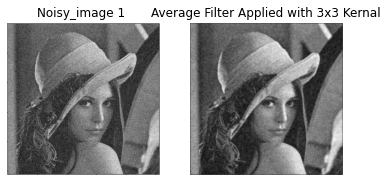

In [12]:


# Applying Average Filter 
def Average_Filter(image,Kernal_size):
        kernal=Create_box_filterKernal(Kernal_size)
        new_image=Convolution(image,kernal)
        norm = normalization(new_image)
        return (Image.fromarray(norm))

Noisy_image = Image.open("uniform_noise.png").convert('L')
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(Noisy_image ,cmap='gray')
plt.axis('off')
plt.title("Noisy_image 1 ")

AVG_Filterd_image=Average_Filter(Noisy_image,3)
fig.add_subplot(1,2,2)
plt.imshow(AVG_Filterd_image,cmap='gray')
plt.axis('off')
plt.title("Average Filter Applied with 3x3 Kernal")
plt.savefig('AVG_Filterd_image.png')
plt.show() 


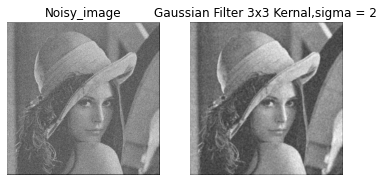

In [21]:

# Applying Gaussian Filter 
def Gaussian_Filter(image,Kernal_size,std):
        kernal=Create_Gaussian_filterKernal(Kernal_size,std)
        new_image=Convolution(image,kernal)
        norm =normalization(new_image)
        return (Image.fromarray(norm))  

Noisy_image2= Image.open("gaussian_noise.png").convert('L')
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(Noisy_image2 ,cmap='gray')

plt.axis('off')
plt.title("Noisy_image")

Gaussian_Filterd_image=Gaussian_Filter(Noisy_image2,3,2)
fig.add_subplot(1,2,2)
plt.imshow(Gaussian_Filterd_image,cmap='gray')
plt.axis('off')
plt.title("Gaussian Filter 3x3 Kernal,sigma = 2")
plt.show() 

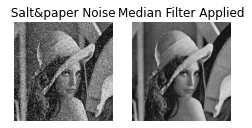

In [22]:
# Applying Median Filter 
def Median_Filter(image,Kernal_size):
        window_data=[]
        image_arr=np.array(image)
        rows, columns = image_arr.shape
        new_image=np.ones([rows-(Kernal_size-1), columns-(Kernal_size-1)], dtype = int)
# For Moving Window
        for i in range(rows-(Kernal_size-1)):
            for j in range(columns-(Kernal_size-1)):
                # For convolving with kernals depening on their selected size
                for rp in range (i,i+Kernal_size):
                      for cp in range (j,j+Kernal_size):
                            window_data.append(image_arr[rp][cp])
# median_value=get_median(window_data)
                new_image[i][j]=get_median(window_data) 
                window_data=[]   
        return (Image.fromarray(new_image))

fig = plt.figure()
# opening image using pil and converting image to GrayScale 
salt_papper_Noisy_image = Image.open("saltandpapper.jpg").convert('L')
# Adds a Noisy Img at the 1st position
fig.add_subplot(1,3,1)
plt.imshow(salt_papper_Noisy_image ,cmap='gray')
plt.axis('off')
plt.title(" Salt&paper Noise ")


# Filter Image
Median_Filterd_image=Median_Filter(salt_papper_Noisy_image ,3)
fig.add_subplot(1,3,2)
plt.imshow(Median_Filterd_image,cmap='gray')
plt.axis('off')
plt.title("Median Filter Applied")
plt.show() 